In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bert = pd.read_csv("df_cbd_bert.csv")

In [3]:
df_bert

,index,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,X..CBD
0,8,0.300818,0.117299,0.643727,0.152582,0.012138,-0.430934,0.801716,0.031614,-0.120514,...,0.128118,0.140427,-0.141514,0.348772,-0.738661,0.141317,-0.830303,-0.177379,-0.900806,0.001046
1,14,0.124309,0.161562,0.573033,-0.019954,0.059185,-0.295751,0.495331,0.220471,-0.019156,...,0.135187,0.180882,-0.089732,0.199170,-0.706113,-0.035785,-0.544304,-0.166163,-0.541058,0.001046
2,15,-0.232188,0.163139,0.578652,-0.003896,0.093456,-0.162398,0.253359,0.544303,0.089369,...,-0.074476,0.142927,-0.040942,0.006959,-0.400928,-0.109898,-0.293222,-0.007909,-0.331629,0.001046
3,18,0.159101,0.116514,0.596216,0.099526,0.017107,-0.422273,0.761935,0.105024,-0.073867,...,0.134182,0.147276,-0.084956,0.301484,-0.769129,0.131591,-0.821295,-0.163698,-0.824827,0.001046
4,18,0.159101,0.116514,0.596216,0.099526,0.017107,-0.422273,0.761935,0.105024,-0.073867,...,0.134182,0.147276,-0.084956,0.301484,-0.769129,0.131591,-0.821295,-0.163698,-0.824827,0.001046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,42969,0.212347,0.124677,0.604793,0.083085,0.034133,-0.408407,0.786280,0.111345,-0.127262,...,0.161177,0.153434,-0.125303,0.314786,-0.765685,0.128396,-0.816410,-0.213200,-0.849931,0.001046
59996,42970,0.109320,0.095256,0.523631,-0.007430,0.055264,-0.338708,0.570877,0.232808,-0.009438,...,0.124365,0.174935,-0.110914,0.197620,-0.678949,0.039182,-0.663883,-0.163899,-0.593018,0.001046
59997,42972,0.102736,0.135983,0.550969,-0.014671,0.015193,-0.269029,0.679146,0.145063,-0.059002,...,0.252791,0.156139,-0.121033,0.199727,-0.782018,-0.003939,-0.664979,-0.150894,-0.634808,0.001046
59998,42973,0.233248,0.109718,0.598537,0.061358,0.088095,-0.390093,0.800446,0.077057,-0.104278,...,0.195909,0.095593,-0.109210,0.319783,-0.766471,0.119461,-0.819312,-0.167582,-0.830700,0.001046


In [4]:
df_bert.columns.to_list()

['index',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_

In [5]:
X = df_bert.drop(['X..CBD', 'index'], axis = 1)
y = df_bert[['X..CBD']]

<AxesSubplot:ylabel='Count'>

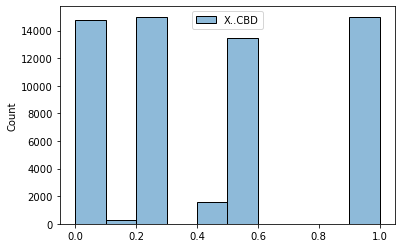

In [6]:
sns.histplot(y, bins = 10)

PCA

In [7]:
pca = PCA()
pca_comps = pca.fit_transform(X)

In [8]:
pca_comps

array([[-2.53000181e+00,  7.98126649e-01,  1.26331021e-01, ...,
         2.24271770e-03,  2.05093158e-04, -3.61987764e-08],
       [ 3.28699595e+00, -4.76076871e-02,  1.14222242e-01, ...,
         6.27569052e-03,  2.03573645e-03,  3.82853697e-09],
       [ 8.91039748e+00,  2.77049108e+00,  5.46733838e-01, ...,
         7.22619290e-03, -1.20367086e-02,  3.40673280e-08],
       ...,
       [ 1.31141412e+00, -5.75570658e-01, -5.08822535e-01, ...,
         5.77675070e-03,  2.17679982e-03, -3.11328201e-08],
       [-1.88182263e+00,  3.99537992e-01, -2.76986941e-01, ...,
         4.27086885e-03, -2.00572276e-03,  7.75993725e-09],
       [-2.79795975e+00,  1.12855332e+00, -1.01446531e-01, ...,
        -9.09611857e-04, -1.35556303e-04, -6.59391122e-08]])

In [9]:
type(pca_comps)

numpy.ndarray

In [10]:
explained_variance = pca.explained_variance_ratio_

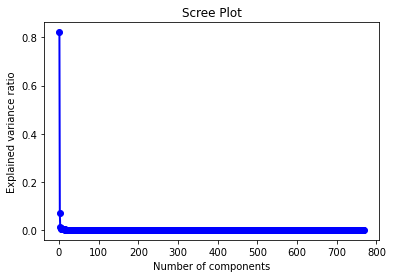

In [11]:
plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', linewidth=2)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Scree Plot')
plt.show()

In [12]:
# Calculate the second derivative of the explained variance ratio curve
second_der = np.diff(explained_variance, 2)

# Find the index of the maximum value of the second derivative
elbow_index = np.argmax(second_der) + 1

# The optimal number of components is the index of the elbow point
n_components_optimal = elbow_index

In [13]:
n_components_optimal

1

In [14]:
X_reduced = pca.transform(X)[:, :n_components_optimal]

In [15]:
X_reduced

array([[-2.53000181],
       [ 3.28699595],
       [ 8.91039748],
       ...,
       [ 1.31141412],
       [-1.88182263],
       [-2.79795975]])

In [16]:
X_reduced = pd.DataFrame(X_reduced)
X_reduced = X_reduced.add_prefix('pca_')
X_reduced

,pca_0
0,-2.530002
1,3.286996
2,8.910397
3,-1.577938
4,-1.577938
...,...
59995,-1.532177
59996,2.675647
59997,1.311414
59998,-1.881823


train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, test_size=0.2)

In [18]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

kNN (before feature selection and hyperparameter tuning)

In [19]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [20]:
mean_absolute_error(y_val, y_pred_knreg)

0.04693875092393858

In [21]:
mean_squared_error(y_val, y_pred_knreg)

0.030145655048540863

In [22]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1736250415364698

In [23]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8826031969866461

In [24]:
#val
r2_score(y_val, y_pred_knreg)

0.7755721314408486

RF (before feature selection and hyperparameter tuning)

In [25]:
rfreg = RandomForestRegressor()
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_3470/2685114911.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [26]:
mean_absolute_error(y_val, y_pred_rfreg)

0.026421378109078034

In [27]:
mean_squared_error(y_val, y_pred_rfreg)

0.01637518984808846

In [28]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.12796558071641162

In [29]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9842123378492142

In [30]:
#val
r2_score(y_val, y_pred_rfreg)

0.8780902604723518

Hyperparameter tuning (kNN)

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors=5, weights='distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.02898074817554319

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.019362924111921965

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.13915072443908427

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9999997221353851

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8558472263908697

Hyperparameter tuning (RF)

In [41]:
parameters_rf = {'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [42]:
rscv_rf = RandomizedSearchCV(rfreg,  
                     parameters_rf,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs = -1)

In [43]:
rscv_rf.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/mod

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [44]:
rscv_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100}

RF (after hyperparameter tuning)

In [45]:
rfreg_ht = RandomForestRegressor(n_estimators=100, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=100)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg_ht = rfreg_ht.predict(X_val)
y_pred_rfreg_ht_r2 = rfreg_ht.predict(X_train1)

/var/folders/y1/pjvjlkjn5gl846rnyzr53p340000gn/T/ipykernel_3470/2054222723.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [46]:
mean_absolute_error(y_val, y_pred_rfreg_ht)

0.02684905275892748

In [47]:
mean_squared_error(y_val, y_pred_rfreg_ht)

0.016387655453593126

In [48]:
mean_squared_error(y_val, y_pred_rfreg_ht, squared = False)

0.1280142783192294

In [49]:
#train
r2_score(y_train1, y_pred_rfreg_ht_r2)

0.9834469594603753

In [50]:
#val
r2_score(y_val, y_pred_rfreg_ht)

0.8779974567409615

Predicting on the test set (kNN)

In [51]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [52]:
import joblib

joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_bert_cbd.pkl")
joblib.dump(y_test, "y_test_knreg_bert_cbd.pkl")

['y_test_knreg_bert_cbd.pkl']

In [53]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.028858380276040842

In [54]:
mean_squared_error(y_test, y_pred_knreg_test)

0.018459570574548827

In [55]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.1358660022763194

In [56]:
r2_score(y_test, y_pred_knreg_test)

0.8610090129525989

Error analysis (kNN)

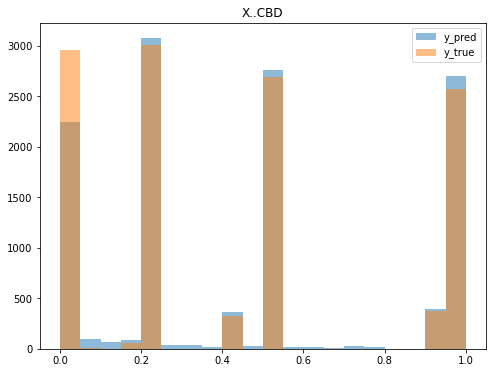

<Figure size 432x288 with 0 Axes>

In [57]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_bert_cbd.png')

Pearson R (kNN)

In [58]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.932
P-value: 0.000


Predicting on the test set (RF)

In [59]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_bert_cbd.pkl")
joblib.dump(y_test, "y_test_rfreg_bert_cbd.pkl")

['y_test_rfreg_bert_cbd.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.02619361274309466

In [62]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.015055840378876145

In [63]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.1227022427622093

In [64]:
r2_score(y_test, y_pred_rfreg_test)

0.8866373349999092

Error analysis (RF)

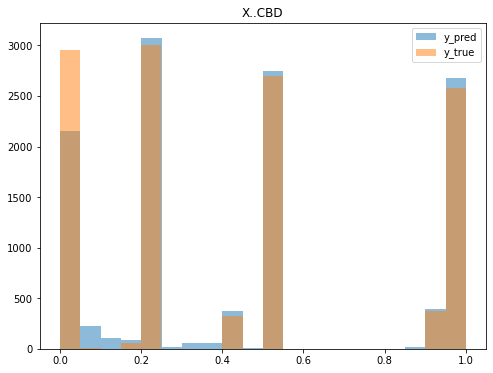

<Figure size 432x288 with 0 Axes>

In [65]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBD"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_bert_cbd.png')

Pearson R (RF)

In [66]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.944
P-value: 0.000
